In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [84]:
df = pd.read_csv("data/merged.csv",dtype=float, parse_dates=["ymd"])

In [85]:
df2 = pd.read_csv("data/dam.csv",dtype=float, parse_dates=["obsymd"])

In [86]:
df2.rename(columns={"obsymd":"ymd", "rf":"damrf"}, inplace=True)

In [93]:
dff = pd.merge(df, df2, on="ymd", how="left")
dff.index = dff["ymd"]

In [95]:
dff.drop(["ymd"], axis=1, inplace=True)

In [96]:
dff = dff[dff.index < "2016-12-31"]

In [98]:
# add time features
dff["year"] = dff.index.year
dff["month"] = dff.index.month
dff["day"] = dff.index.day

# and convert timefeatures to sin/cos
dff["sin_month"] = np.sin(2*np.pi*dff["month"]/12)
dff["cos_month"] = np.cos(2*np.pi*dff["month"]/12)
dff["sin_day"] = np.sin(2*np.pi*dff["day"]/31)
dff["cos_day"] = np.cos(2*np.pi*dff["day"]/31)


# drop time features
dff.drop(["year","month","day"], axis=1, inplace=True)



C:\Users\hj\AppData\Local\Temp\ipykernel_7540\68920096.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff["year"] = dff.index.year
C:\Users\hj\AppData\Local\Temp\ipykernel_7540\68920096.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff["month"] = dff.index.month
C:\Users\hj\AppData\Local\Temp\ipykernel_7540\68920096.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docum

In [99]:
dff

,taavg,hmavg,wl,fw,rf,rwl,iqty,tdqty,edqty,spdqty,otltdqty,itqty,damrf,sin_month,cos_month,sin_day,cos_day
ymd,,,,,,,,,,,,,,,,,
2008-09-28,13.7,72.9,0.0942,4.64,0.0,134.04,38.2,80.2,80.2,0.0,0.0,0.0,0.0,-1.000000e+00,-1.836970e-16,-0.571268,0.820763
2008-09-29,16.6,70.9,0.0900,4.44,0.0,133.99,38.9,80.9,80.9,0.0,0.0,0.0,0.0,-1.000000e+00,-1.836970e-16,-0.394356,0.918958
2008-09-30,15.0,79.3,0.1167,5.75,0.0,133.93,30.5,80.8,80.8,0.0,0.0,0.0,0.0,-1.000000e+00,-1.836970e-16,-0.201299,0.979530
2008-10-01,17.1,73.3,0.1183,5.83,0.0,133.91,53.3,70.1,70.1,0.0,0.0,0.0,0.1,-8.660254e-01,5.000000e-01,0.201299,0.979530
2008-10-02,17.6,72.4,0.1463,7.21,0.0,133.84,11.6,70.1,70.1,0.0,0.0,0.0,0.0,-8.660254e-01,5.000000e-01,0.394356,0.918958
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-26,2.3,89.2,0.1800,0.00,6.0,126.77,86.1,45.0,45.0,0.0,0.0,0.0,4.9,-2.449294e-16,1.000000e+00,-0.848644,0.528964
2016-12-27,-0.2,71.3,0.1500,0.00,2.0,126.82,94.4,60.1,60.1,0.0,0.0,0.0,1.5,-2.449294e-16,1.000000e+00,-0.724793,0.688967
2016-12-28,-4.2,66.8,0.1400,0.00,0.0,126.84,78.8,65.0,65.0,0.0,0.0,0.0,0.2,-2.449294e-16,1.000000e+00,-0.571268,0.820763


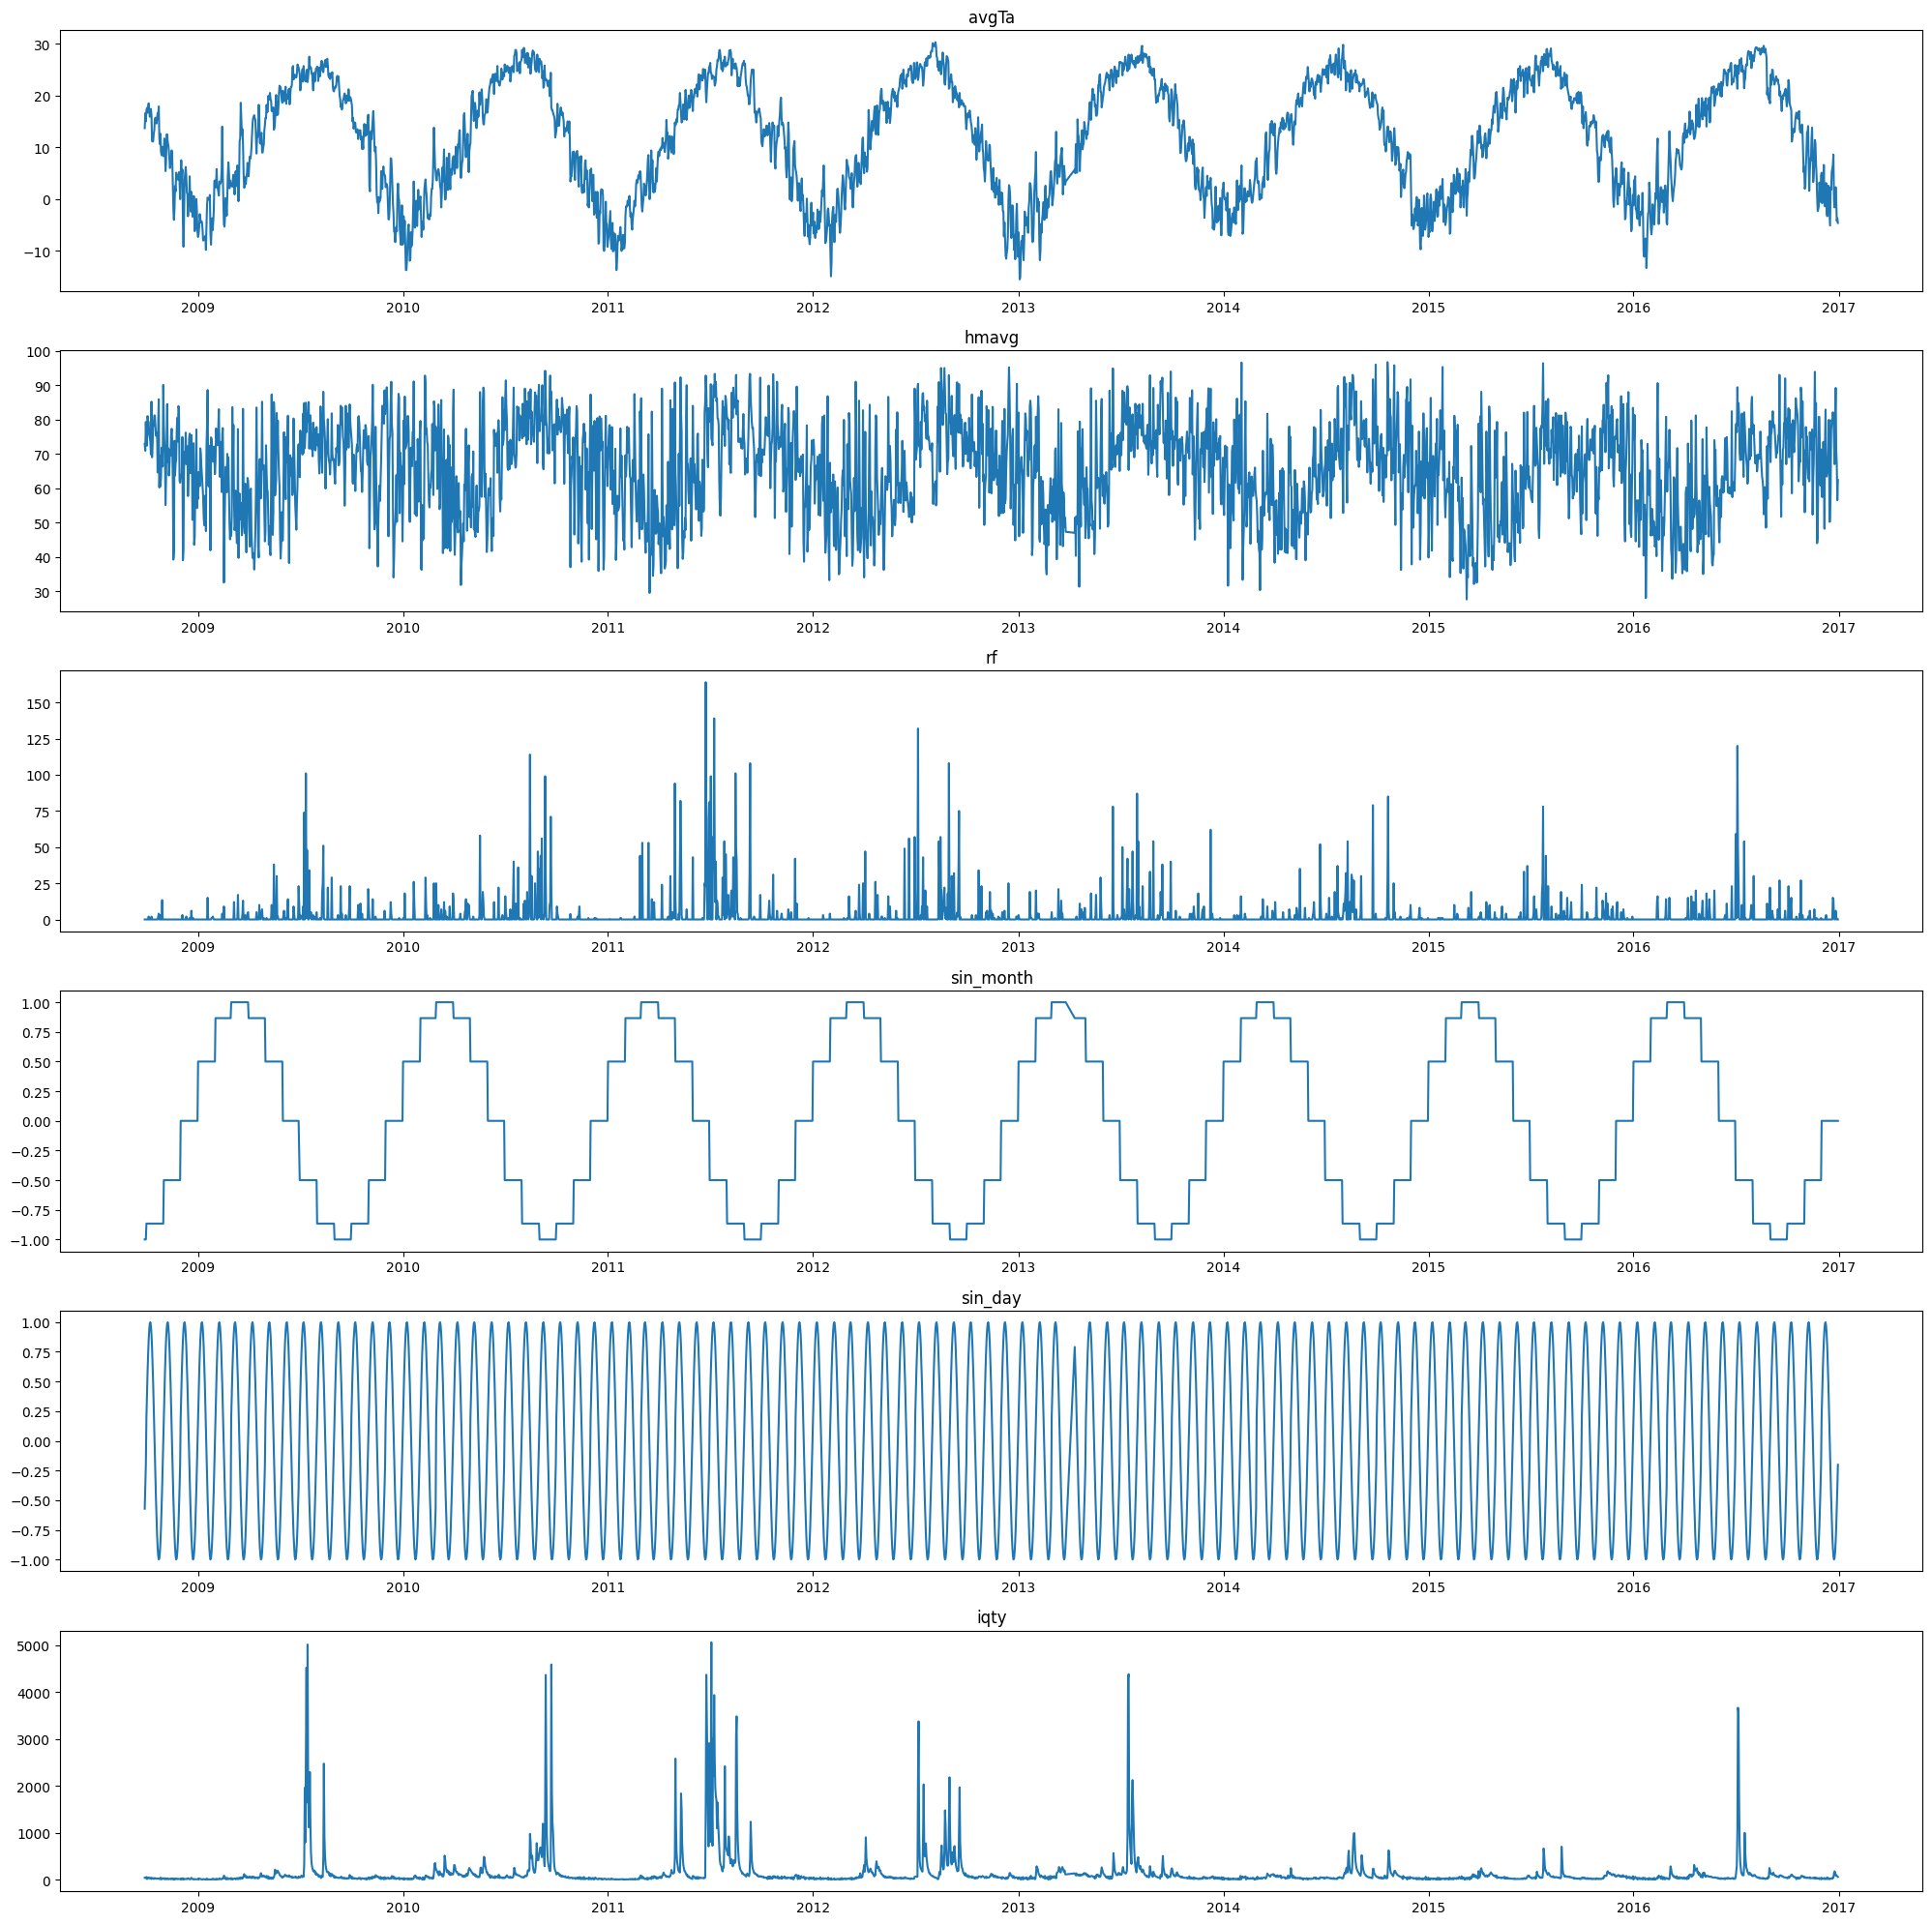

In [92]:
fig, ax = plt.subplots(6,1, figsize = (20,20))
cols = dff.columns
ax[0].plot(dff[cols[0]])
ax[0].set_title("avgTa")
ax[1].plot(dff[cols[1]])
ax[1].set_title("hmavg")
ax[5].plot(dff["iqty"])
ax[5].set_title("iqty")
ax[2].plot(dff["rf"])
ax[2].set_title("rf")
ax[3].plot(dff["sin_month"])
ax[3].set_title("sin_month")
ax[4].plot(dff["sin_day"])
ax[4].set_title("sin_day")
plt.tight_layout()




In [100]:
dff.drop(columns=["rwl","wl","tdqty","edqty","spdqty","otltdqty","itqty","damrf"], inplace=True)

C:\Users\hj\AppData\Local\Temp\ipykernel_7540\297155997.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff.drop(columns=["rwl","wl","tdqty","edqty","spdqty","otltdqty","itqty","damrf"], inplace=True)


In [101]:
dff.drop(columns=["fw"], inplace=True)

C:\Users\hj\AppData\Local\Temp\ipykernel_7540\3631606122.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff.drop(columns=["fw"], inplace=True)


In [103]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
dff_transformed = sc.fit_transform(dff)

In [116]:
dff["ymd"] = dff.index

C:\Users\hj\AppData\Local\Temp\ipykernel_7540\2218727154.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff["ymd"] = dff.index


In [120]:
# dff.drop(columns=["sin_month","cos_month","sin_day","cos_day"], inplace=True)
dff.to_csv("data/merged_s.csv", index=False)

In [110]:
test_size = 365
train_size = int(dff_transformed.shape[0]) - 365*2
validation_size = 365
training_data = dff_transformed[:train_size]
validation_data = dff_transformed[train_size:train_size+validation_size]
test_data = dff_transformed[train_size+validation_size:]
print(f"Training data shape: {training_data.shape}")
print(f"Test data shape: {test_data.shape}")
print(f"Validation data shape: {validation_data.shape}")


Training data shape: (2265, 8)
Test data shape: (365, 8)
Validation data shape: (365, 8)


0.24373956594323873

<Axes: xlabel='ymd'>

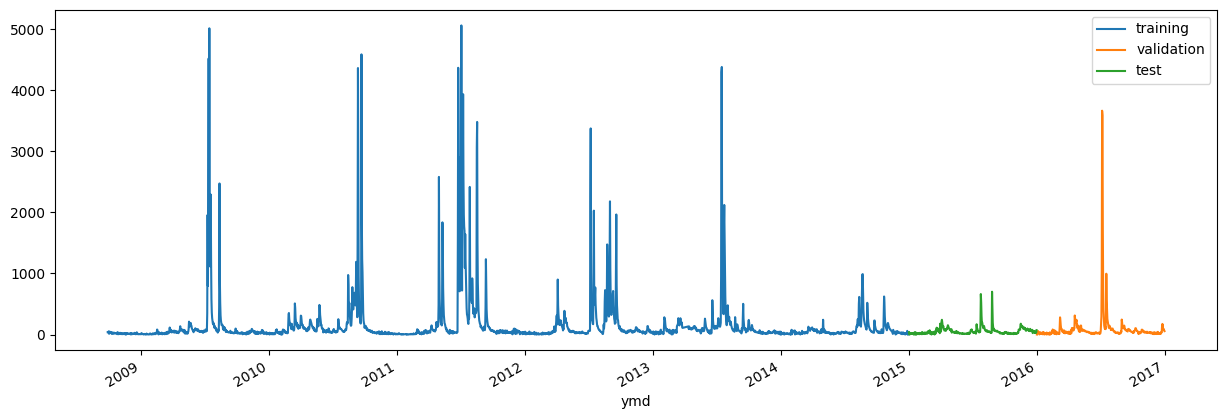

In [66]:
fig, ax = plt.subplots(figsize=(15, 5))
training_data.plot(x="ymd", y="iqty", ax=ax, label="training")
validation_data.plot(x="ymd", y="iqty", ax=ax, label="validation")
test_data.plot(x="ymd", y="iqty", ax=ax, label="test")


In [68]:
training_data.drop(columns=["ymd"], inplace=True)
test_data.drop(columns=["ymd"], inplace=True)
validation_data.drop(columns=["ymd"], inplace=True)


C:\Users\hj\AppData\Local\Temp\ipykernel_7540\183895337.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_data.drop(columns=["ymd"], inplace=True)
C:\Users\hj\AppData\Local\Temp\ipykernel_7540\183895337.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data.drop(columns=["ymd"], inplace=True)
C:\Users\hj\AppData\Local\Temp\ipykernel_7540\183895337.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation_data.dro

In [80]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
sc.fit(training_data)

In [112]:
X_train = training_data[:,[i for i in range(7) if i != 3]]
y_train = training_data[:,[3]]
X_test = test_data[:,[i for i in range(7) if i != 3]]
y_test = test_data[:,[3]]
X_val = validation_data[:,[i for i in range(7) if i != 3]]
y_val = validation_data[:,[3]]


In [113]:
from xgboost import XGBRegressor
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV

# XGBoost
cv_split = TimeSeriesSplit(n_splits=4, test_size=100)
model = XGBRegressor()
parameters = {
    "max_depth": [3, 4, 7],
    "learning_rate": [0.01, 0.05, 0.1, 0.2, 0.3],
    "n_estimators": [100, 300]
}


grid_search = GridSearchCV(estimator=model, cv=cv_split, param_grid=parameters)
grid_search.fit(X_train, y_train)

print(f"Best parameters: {grid_search.best_params_}")

ValueError: 
All the 120 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
120 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\hj\transformer\venv\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\hj\transformer\venv\lib\site-packages\xgboost\core.py", line 620, in inner_f
    return func(**kwargs)
  File "c:\Users\hj\transformer\venv\lib\site-packages\xgboost\sklearn.py", line 988, in fit
    train_dmatrix, evals = _wrap_evaluation_matrices(
  File "c:\Users\hj\transformer\venv\lib\site-packages\xgboost\sklearn.py", line 448, in _wrap_evaluation_matrices
    train_dmatrix = create_dmatrix(
  File "c:\Users\hj\transformer\venv\lib\site-packages\xgboost\sklearn.py", line 908, in _create_dmatrix
    return DMatrix(**kwargs, nthread=self.n_jobs)
  File "c:\Users\hj\transformer\venv\lib\site-packages\xgboost\core.py", line 620, in inner_f
    return func(**kwargs)
  File "c:\Users\hj\transformer\venv\lib\site-packages\xgboost\core.py", line 754, in __init__
    self.set_info(
  File "c:\Users\hj\transformer\venv\lib\site-packages\xgboost\core.py", line 620, in inner_f
    return func(**kwargs)
  File "c:\Users\hj\transformer\venv\lib\site-packages\xgboost\core.py", line 819, in set_info
    self.set_label(label)
  File "c:\Users\hj\transformer\venv\lib\site-packages\xgboost\core.py", line 950, in set_label
    dispatch_meta_backend(self, label, 'label', 'float')
  File "c:\Users\hj\transformer\venv\lib\site-packages\xgboost\data.py", line 1127, in dispatch_meta_backend
    _meta_from_numpy(data, name, dtype, handle)
  File "c:\Users\hj\transformer\venv\lib\site-packages\xgboost\data.py", line 1050, in _meta_from_numpy
    _check_call(_LIB.XGDMatrixSetInfoFromInterface(handle, c_str(field), interface_str))
  File "c:\Users\hj\transformer\venv\lib\site-packages\xgboost\core.py", line 279, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [13:44:05] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\data\data.cc:461: Check failed: valid: Label contains NaN, infinity or a value too large.


In [115]:
xgb = XGBRegressor(objective="reg:squarederror", max_depth=3, learning_rate=0.1, n_estimators=100)
xgb.fit(X_train, y_train.reshape(-1,1))

# y_pred = xgb.predict(X_test)
# y_pred2 = xgb.predict(X_train)

# # evaluate the model
# from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")
# print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred)}")
# print(f"R2 Score: {r2_score(y_test, y_pred)}")

# print(f"Mean Squared Error: {mean_squared_error(y_train, y_pred2)}")
# print(f"Mean Absolute Error: {mean_absolute_error(y_train, y_pred2)}")
# print(f"R2 Score: {r2_score(y_train, y_pred2)}")


# plot the results
fig, ax = plt.subplots(figsize=(15, 5))
plt.plot( y_test, label="Actual")
plt.plot(y_pred, label="Predicted")




XGBoostError: [13:45:43] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\data\data.cc:461: Check failed: valid: Label contains NaN, infinity or a value too large.

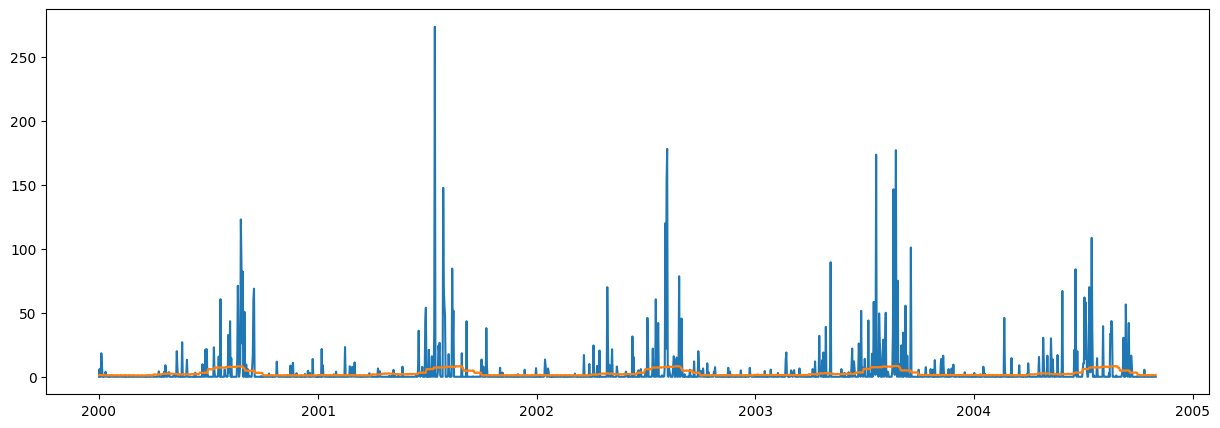

In [20]:
fig, ax = plt.subplots(figsize=(15, 5))
plt.plot(training_data.index,y_train, label="Actual")
plt.plot(training_data.index,y_pred2, label="Predicted")

DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-03', '2000-01-04',
               '2000-01-05', '2000-01-06', '2000-01-07', '2000-01-08',
               '2000-01-09', '2000-01-10',
               ...
               '2004-10-22', '2004-10-23', '2004-10-24', '2004-10-25',
               '2004-10-26', '2004-10-27', '2004-10-28', '2004-10-29',
               '2004-10-30', '2004-10-31'],
              dtype='datetime64[ns]', name='tm', length=1766, freq=None)

Mean Squared Error: 24.134483337402344
Mean Absolute Error: 1.997063159942627
R2 Score: 0.07615958878193407
Mean Squared Error: 201.65090942382812
Mean Absolute Error: 4.535484790802002
R2 Score: 0.23677504058117416


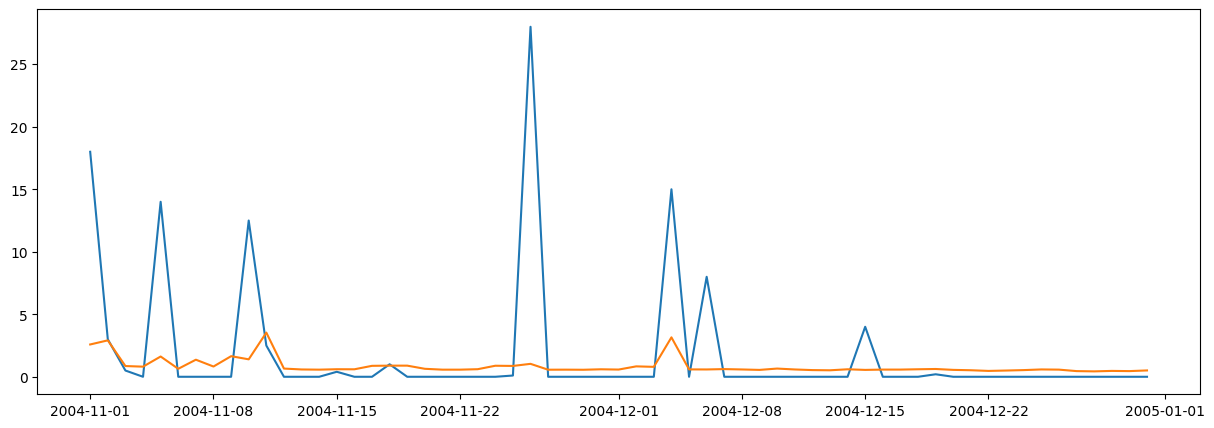

In [21]:
X_train = training_data[["day_of_week", "day_of_year", "month", "quarter", "year", "avgTa", "maxTa", "avgWs", "avgRhm"]]
y_train = training_data["sumRn"]

X_test = test_data[["day_of_week", "day_of_year", "month", "quarter", "year", "avgTa", "maxTa", "avgWs", "avgRhm"]]
y_test = test_data["sumRn"]

from xgboost import XGBRegressor
import lightgbm as lgb
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV

# # XGBoost
# cv_split = TimeSeriesSplit(n_splits=4, test_size=100)
# model = XGBRegressor()
# parameters = {
#     "max_depth": [3, 4, 6, 5, 10],
#     "learning_rate": [0.01, 0.05, 0.1, 0.2, 0.3],
#     "n_estimators": [100, 300, 500, 700, 900, 1000],
#     "colsample_bytree": [0.3, 0.5, 0.7]
# }


# grid_search = GridSearchCV(estimator=model, cv=cv_split, param_grid=parameters)
# grid_search.fit(X_train, y_train)

# print(f"Best parameters: {grid_search.best_params_}")

xgb = XGBRegressor(objective="reg:squarederror",**grid_search.best_params_)
xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)
y_pred2 = xgb.predict(X_train)

# evaluate the model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred)}")
print(f"R2 Score: {r2_score(y_test, y_pred)}")

print(f"Mean Squared Error: {mean_squared_error(y_train, y_pred2)}")
print(f"Mean Absolute Error: {mean_absolute_error(y_train, y_pred2)}")
print(f"R2 Score: {r2_score(y_train, y_pred2)}")

# plot the results
fig, ax = plt.subplots(figsize=(15, 5))
plt.plot(test_dates, y_test, label="Actual")
plt.plot(test_dates, y_pred, label="Predicted")


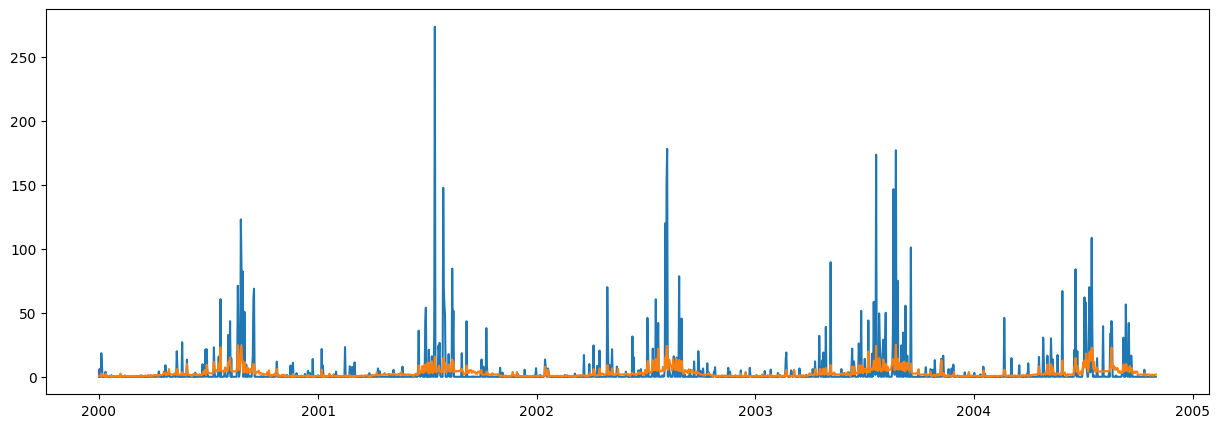

In [22]:
fig, ax = plt.subplots(figsize=(15, 5))
plt.plot(training_data.index,y_train, label="Actual")
plt.plot(training_data.index,y_pred2, label="Predicted")

Mean Squared Error: 26.512229919433594
Mean Absolute Error: 2.5611257553100586
R2 Score: -0.01485769702476425
Mean Squared Error: 247.51731872558594
Mean Absolute Error: 5.443578243255615
R2 Score: 0.06317597988758261


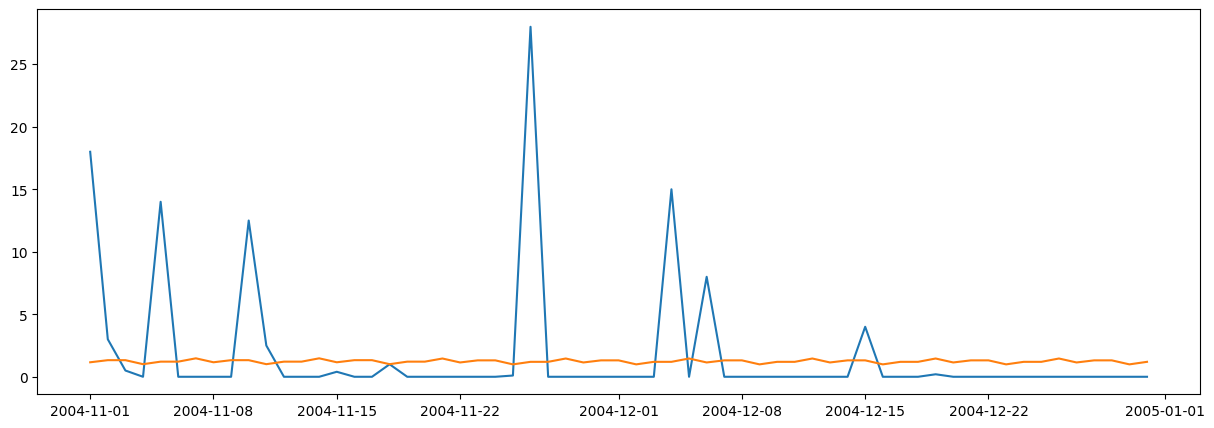

In [23]:
X_train = training_data[["day_of_week", "day_of_year", "month", "quarter", "year",]]
y_train = training_data["sumRn"]

X_test = test_data[["day_of_week", "day_of_year", "month", "quarter", "year",]]
y_test = test_data["sumRn"]

from xgboost import XGBRegressor
import lightgbm as lgb
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV

# # XGBoost
# cv_split = TimeSeriesSplit(n_splits=4, test_size=100)
# model = XGBRegressor()
# parameters = {
#     "max_depth": [3, 4, 6, 5, 10],
#     "learning_rate": [0.01, 0.05, 0.1, 0.2, 0.3],
#     "n_estimators": [100, 300, 500, 700, 900, 1000],
#     "colsample_bytree": [0.3, 0.5, 0.7]
# }


# grid_search = GridSearchCV(estimator=model, cv=cv_split, param_grid=parameters)
# grid_search.fit(X_train, y_train)

# print(f"Best parameters: {grid_search.best_params_}")

xgb = XGBRegressor(objective="reg:squarederror",**grid_search.best_params_)
xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)
y_pred2 = xgb.predict(X_train)

# evaluate the model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred)}")
print(f"R2 Score: {r2_score(y_test, y_pred)}")

print(f"Mean Squared Error: {mean_squared_error(y_train, y_pred2)}")
print(f"Mean Absolute Error: {mean_absolute_error(y_train, y_pred2)}")
print(f"R2 Score: {r2_score(y_train, y_pred2)}")

# plot the results
fig, ax = plt.subplots(figsize=(15, 5))
plt.plot(test_dates, y_test, label="Actual")
plt.plot(test_dates, y_pred, label="Predicted")


In [62]:
df = pd.read_csv("Rainfall_1901_2016_PAK.csv")
print(df.isna().sum())
df.index = pd.date_range(start = "1901-01-01", end = "2016-12-31", freq = "M")
df.columns = ["rainfall", "Year", "Month"]
def add_time_features(df):
    df["month"] = df.index.month
    df["quarter"] = df.index.quarter
    df["year"] = df.index.year
    
    return df
add_time_features(df)
df = df.drop(columns = ["Year", "Month"])

df["tm"] = df.index


Rainfall - (MM)    0
 Year              0
Month              0
dtype: int64


In [63]:
training_data = df.query("tm < '2000-01-01'")
test_data = df.query("tm >= '2000-01-01'")
print(f"Training data shape: {training_data.shape}")
print(f"Test data shape: {test_data.shape}")
training_data = training_data.drop(columns=["tm"])
test_dates = test_data["tm"]
test_data = test_data.drop(columns=["tm"])


Training data shape: (1188, 5)
Test data shape: (204, 5)


Best parameters: {'colsample_bytree': 0.3, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 900}
Mean Squared Error: 239.70022075114963
Mean Absolute Error: 11.065438002694822
R2 Score: 0.4846268145231162


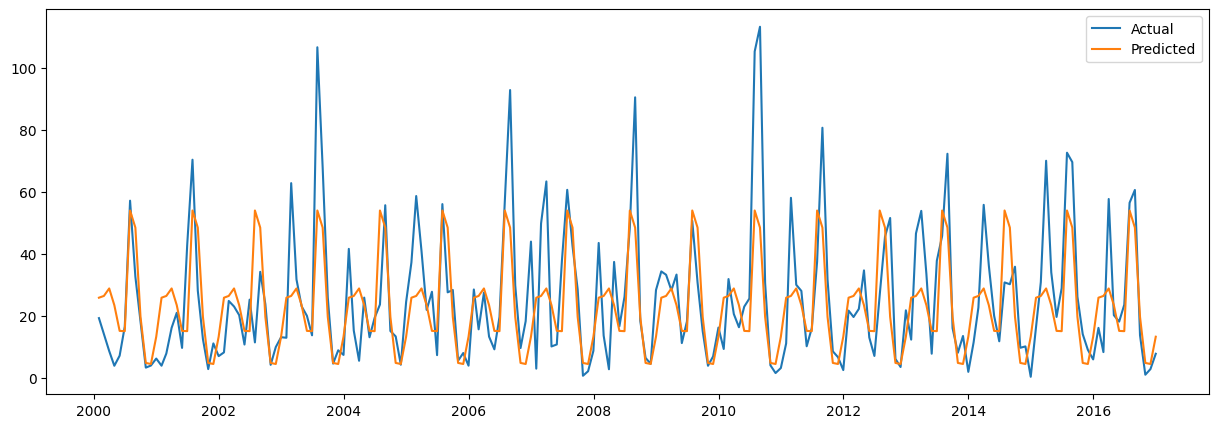

In [68]:
X_train = training_data[[ "month", "quarter", "year"]]
y_train = training_data["rainfall"]

X_test = test_data[["month","quarter", "year"]]
y_test = test_data["rainfall"]


from xgboost import XGBRegressor
import lightgbm as lgb
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV

# XGBoost
cv_split = TimeSeriesSplit(n_splits=4, test_size=100)
model = XGBRegressor()
parameters = {
    "max_depth": [3, 4, 6, 5, 10],
    "learning_rate": [0.01, 0.05, 0.1, 0.2, 0.3],
    "n_estimators": [100, 300, 500, 700, 900, 1000],
    "colsample_bytree": [0.3, 0.5, 0.7]
}


grid_search = GridSearchCV(estimator=model, cv=cv_split, param_grid=parameters)
grid_search.fit(X_train, y_train)

print(f"Best parameters: {grid_search.best_params_}")

xgb = XGBRegressor(objective="reg:squarederror",**grid_search.best_params_)
xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)

# evaluate the model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred)}")
print(f"R2 Score: {r2_score(y_test, y_pred)}")

# plot the results
fig, ax = plt.subplots(figsize=(15, 5))
plt.plot(test_dates, y_test, label="Actual")
plt.plot(test_dates, y_pred, label="Predicted")
plt.legend()


In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


df = pd.read_csv("ASOS_Daily_2000_2005.csv")
print(df.isna().sum())

df = df[["tm", "avgTa", "maxTa", "sumRn", "avgWs", "avgRhm"]]
# index to datetime index
df["tm"] = pd.to_datetime(df["tm"])

# the data is not complete
# features of data is str format
# so we have to change the data type
# first, we need to fill the missing data
df = df.applymap(lambda x: 0 if x == "" else x)
df = df.astype({"avgTa": np.float32, "maxTa": np.float32, "sumRn": np.float32, "avgWs": np.float32, "avgRhm": np.float32})

# manipulate the dataframe
# change columns ("avgTa", "maxTa", "sumRn", "avgWs", "avgRhm") to ("unique_id", "value")
# unique_id is the name of the column
# value is the value of the column

df = df.melt(id_vars = ["tm"], value_vars = ["avgTa", "maxTa", "sumRn", "avgWs", "avgRhm"], var_name = "unique_id", value_name = "value")
df.shape





Unnamed: 0       0
stnId            0
stnNm            0
tm               0
avgTa            0
              ... 
sumLrgEv       731
sumSmlEv         2
n99Rn         1114
iscs           439
sumFogDur     1773
Length: 63, dtype: int64


(9135, 3)